# PyMongo Query

db = "test"
collection = "benchmarklogs"

In [1]:
from pymongo import MongoClient
client = MongoClient()

In [2]:
db = client['test']
collection = db['benchmarklogs']

In [3]:
import pprint

#pprint.pprint(collection.find_one())
#for item in collection.find():
#    pprint.pprint(item)


# PyMongo Query ->Pandas DataFrame

In [4]:
import pandas as pd

query = {"$and":[ {"$or":[ {"usedGenesisJson":"genesis_poa_gasLimit_1.json"},{"usedGenesisJson":"genesis_poa_gasLimit_05.json"},{"usedGenesisJson":"genesis_poa_gasLimit_2.json"},{"usedGenesisJson":"genesis_poa_gasLimit_4.json"},{"usedGenesisJson":"genesis_poa_gasLimit_8.json"} ]}, 
        {"maxTransactions": 1000}, {"instanceType":'c5.xlarge'}, {"nodes":5}]}

# query = {}

# Make a query to the specific DB and Collection
cursor = collection.find(query)

# Expand the cursor and construct the DataFrame
df = pd.DataFrame(list(cursor))

#display(df.head(200))

# Pandas DataFrame -> Plot
## Throughput

In [5]:
import matplotlib.pyplot as plt

data_tps = df[['txPerSecond','usedGenesisJson']]
#print(data_tps)

title = "Effect of GasLimit on Throughput in PoA"
xlabel = "GasLimit Factor"
ylabel = "Transactions Per Second (TPS)"

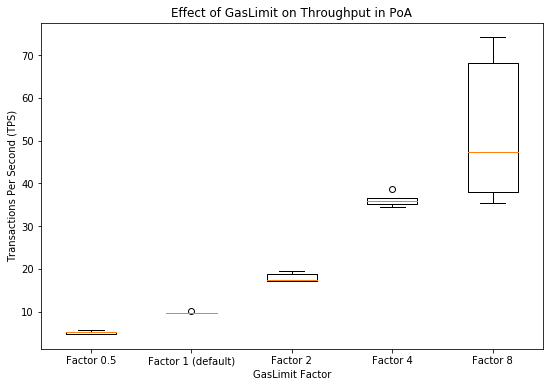

In [6]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Create the boxplot

## combine these different collections into a list    
data_to_plot = [data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_05.json"].iloc[:,0],
                data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_1.json"].iloc[:,0],
                data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_2.json"].iloc[:,0],
                data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_4.json"].iloc[:,0],
                data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_8.json"].iloc[:,0]]

bp = ax.boxplot(data_to_plot,labels=list(["Factor 0.5","Factor 1 (default)","Factor 2","Factor 4","Factor 8"]))
fig.savefig("gasLimit_poa_throughput_boxplot.svg", format="svg")



5.086585779690443
9.705455346534027
17.957728814157868
36.02259437313089
52.232892196751415


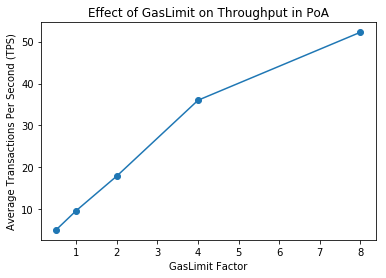

In [7]:

avg05 = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_05.json"].iloc[:,0].mean()
avg1 = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_1.json"].iloc[:,0].mean()
avg2 = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_2.json"].iloc[:,0].mean()
avg4 = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_4.json"].iloc[:,0].mean()
avg8 = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_8.json"].iloc[:,0].mean()

print(avg05)
print(avg1)
print(avg2)
print(avg4)
print(avg8)

plt.plot([0.5,1,2,4,8],[avg05,avg1,avg2,avg4,avg8], marker='o')
plt.title(title)
plt.ylabel("Average Transactions Per Second (TPS)")
plt.xlabel(xlabel)
plt.savefig("gasLimit_poa_throughput_lines_average.svg", format="svg")
plt.show()

## Latency

In [8]:
data_latency = df[['averageDelay','usedGenesisJson']]
#print(data_latency)

title = "Effect of GasLimit on Latency in PoA"
xlabel = "GasLimit Factor"
ylabel = "Transaction Latency [seconds]"

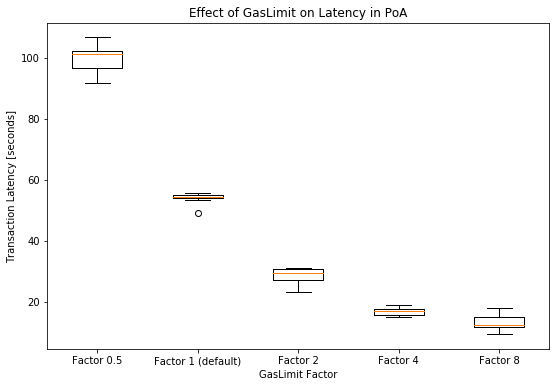

In [9]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Create the boxplot

## combine these different collections into a list    
data_to_plot = [data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_05.json"].iloc[:,0],
                data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_1.json"].iloc[:,0],
                data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_2.json"].iloc[:,0],
                data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_4.json"].iloc[:,0],
                data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_8.json"].iloc[:,0]]

bp = ax.boxplot(data_to_plot,labels=list(["Factor 0.5","Factor 1 (default)","Factor 2","Factor 4","Factor 8"]))
fig.savefig("gasLimit_poa_latency_boxplot.svg", format="svg")



99.85157929999998
53.98155749999997
28.58972330000001
16.724852699999992
13.300552200000004


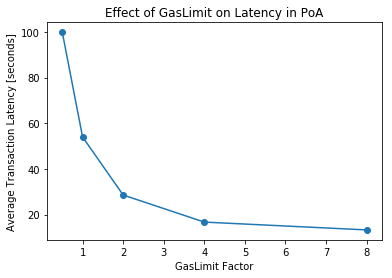

In [10]:

avg05 = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_05.json"].iloc[:,0].mean()
avg1 = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_1.json"].iloc[:,0].mean()
avg2 = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_2.json"].iloc[:,0].mean()
avg4 = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_4.json"].iloc[:,0].mean()
avg8 = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_gasLimit_8.json"].iloc[:,0].mean()

print(avg05)
print(avg1)
print(avg2)
print(avg4)
print(avg8)

plt.plot([0.5,1,2,4,8],[avg05,avg1,avg2,avg4,avg8], marker='o')
plt.title(title)
plt.ylabel("Average Transaction Latency [seconds]")
plt.xlabel(xlabel)
plt.savefig("gasLimit_poa_latency_lines_average.svg", format="svg")
plt.show()